# AST 4930 Week 7

## Emsemble Methods

### Bagging

Text(0, 0.5, 'Feature 2')

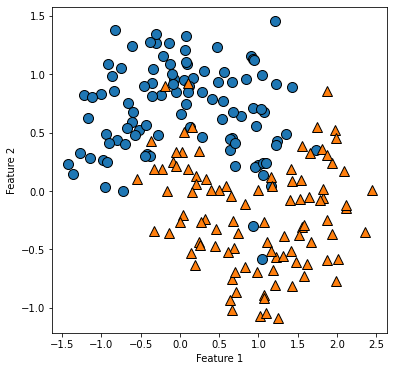

In [148]:
import sklearn
import mglearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.3, random_state=3)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

### Bootstrap

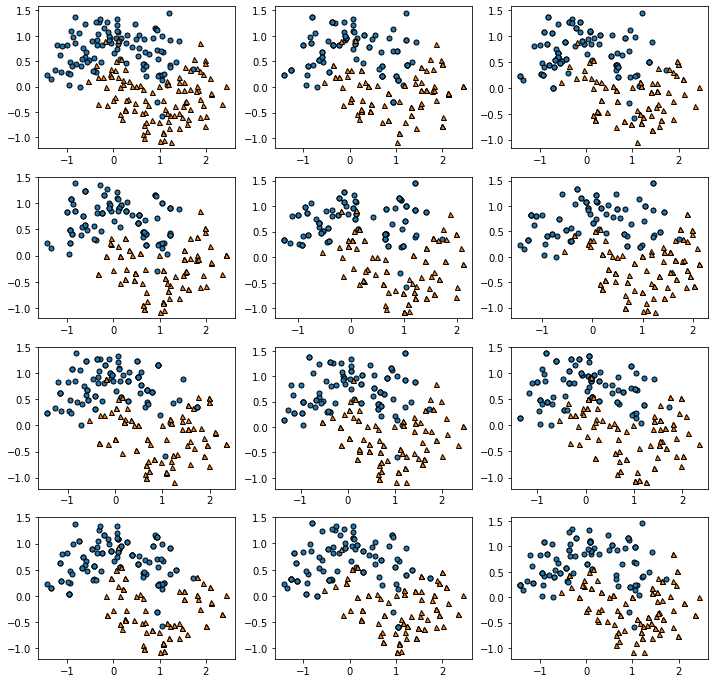

In [149]:
import numpy as np

npanel = 12

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
axs = axs.ravel()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axs[0], s=5)

for i in np.arange(npanel-1):
    # This is where bootstrap is happening.
    indices_with_replacement = np.random.randint(0, len(X), len(X))
    X_new = X[indices_with_replacement]
    y_new = y[indices_with_replacement]

    mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_new, ax = axs[i+1], s=5)

### Decision boundary

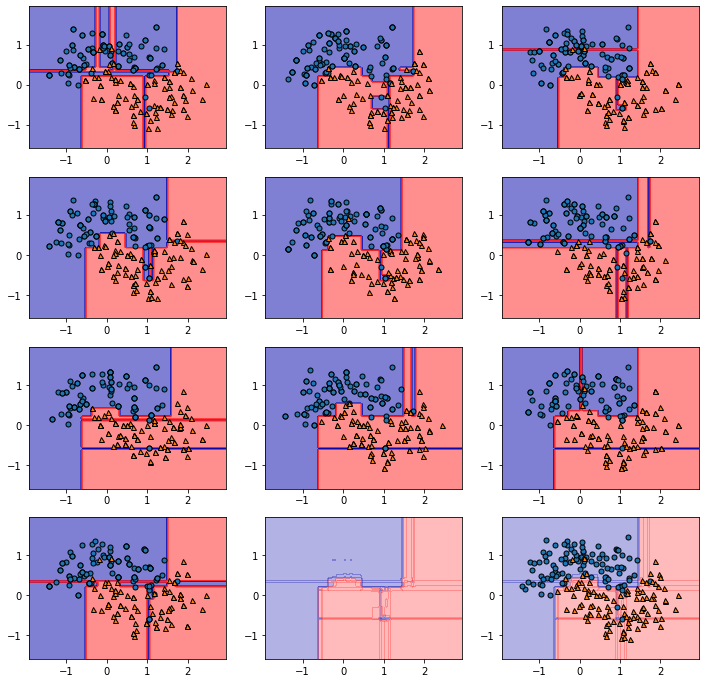

In [150]:
from sklearn.tree import DecisionTreeClassifier

npanel = 12

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
axs = axs.ravel()

xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

# Array to save the averaged decision boundary
Zavg = np.zeros_like(XX)

for i in np.arange(npanel-2):
    indices_with_replacement = np.random.randint(0, len(X), len(X))
    X_new = X[indices_with_replacement]
    y_new = y[indices_with_replacement]
    # DT model with bootstrapped data
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_new, y_new)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    Zavg += Z

    axs[i].contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)
    mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_new, ax = axs[i], s=5)

# Average the decision boundary
Zavg /= npanel

axs[-1].contourf(XX, YY, Zavg, alpha=0.3, cmap=mglearn.cm2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axs[-1], s=5)

axs[-2].contourf(XX, YY, Zavg, alpha=0.3, cmap=mglearn.cm2)

### BaggingClassifier

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
# See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                            max_samples=1.0, bootstrap=True, random_state=0)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.96

In [152]:
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.82

### Decision boundary

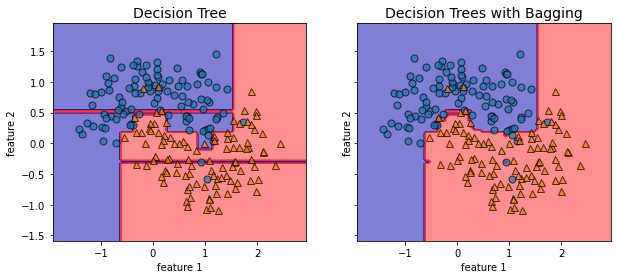

In [153]:
def plot_decision_boundary(model, X, y, alpha=0.5):
    xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

    XX, YY = np.meshgrid(xx, yy)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.contourf(XX, YY, Z, alpha=alpha, cmap=mglearn.cm2)

    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=7, alpha=0.7)

    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.show()

### Random Forests

Text(0, 0.5, 'feature 2')

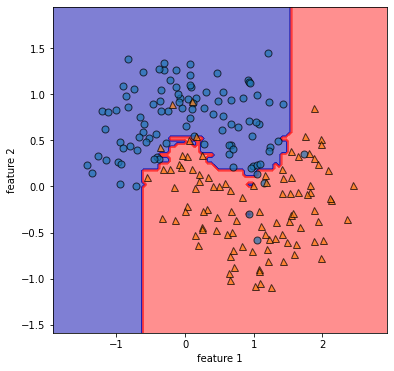

In [154]:
from sklearn.ensemble import RandomForestClassifier
#See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

model = RandomForestClassifier(n_estimators=500, oob_score=True)
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 6))

xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)
Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=7, alpha=0.7)

plt.xlabel('feature 1')
plt.ylabel('feature 2')
    

### Two scores

In [155]:
model = RandomForestClassifier(n_estimators=500, oob_score=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.96

In [156]:
model = RandomForestClassifier(n_estimators=500, oob_score=True)
model.fit(X, y)
model.oob_score_

0.93

### Let's try Random Forests on the MNIST data we used in Week 5.

In [157]:
# You need to select Tensorflow kernel to load the data
from tensorflow.keras.datasets import mnist

# Load the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2021-10-07 10:01:24.461110: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


###  We will take 1/50 of the data.

In [158]:
X_train = X_train[::50]
y_train = y_train[::50]
X_test = X_test[::50]
y_test = y_test[::50]

Text(0.5, 1.0, 'The number is = 5')

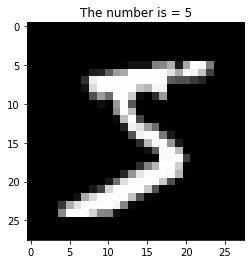

In [159]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.title('The number is = {}'.format(y_train[0]))

### We will "flatten" the data. By flattening, we convert a 2d array with 28x28 elements to an 1d array with 784 elements.

In [160]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

### Let's check the performance of a single DT.

### TODO: write a script that finds the DT model using hyperparameter optimization.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 9}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)
Test score: 0.66


### Q: What is the test score?

### TODO: Now let's check out how Random Forests perform. Compare the score obtained with test dataset and the OOB score obtained with the entire dataset.

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9

In [51]:
model = RandomForestClassifier(n_estimators=500, oob_score=True)
model.fit(X_train, y_train)
model.oob_score_

0.8908333333333334

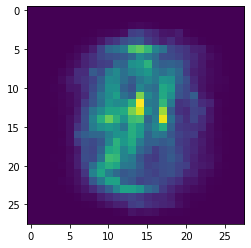

In [56]:
plt.imshow(model.feature_importances_.reshape(28,28))

### AdaBoost

Text(0, 0.5, 'Feature 2')

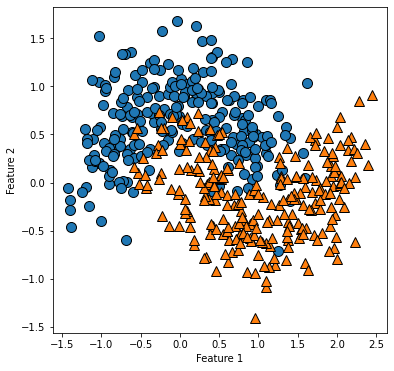

In [161]:
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(figsize=(6, 6))

X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

In [162]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                           algorithm="SAMME", learning_rate=0.5, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

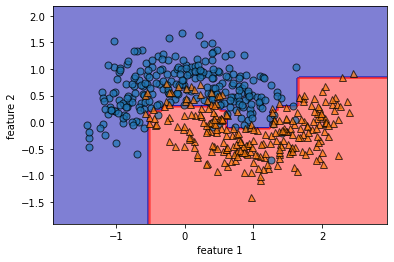

In [163]:
plot_decision_boundary(model, X, y)

### Let's try AdaBoost on two Gaussians.

Text(0, 0.5, 'Feature 2')

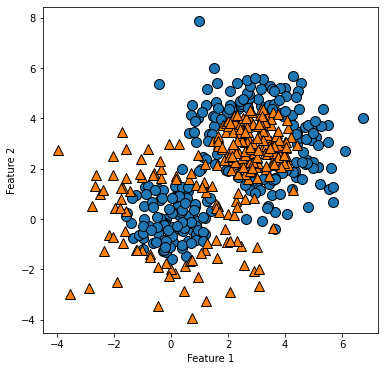

In [249]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import matplotlib.pyplot as plt

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, 
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, 
                                 n_classes=2, random_state=1)

# Merge the two Gaussian
X = np.concatenate((X1, X2))
# We reverse the class of y2
y = np.concatenate((y1, - y2 + 1))

fig, ax = plt.subplots(figsize=(6, 6))

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

### What ML algorithm do you think would work the best? SVM!

### TODO: Find the best SVM model using hyperparameter optimization.

In [250]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

param_grid = {'C': [0.01, 0.1, 1., 10., 100., 1.0e3],
              'gamma': [0.01, 0.1, 1., 10., 100.]}

grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5, return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'C': 1000.0, 'gamma': 0.1}
Best model: SVC(C=1000.0, gamma=0.1)
Test score: 0.96


### TODO: Plot the decision boundary.

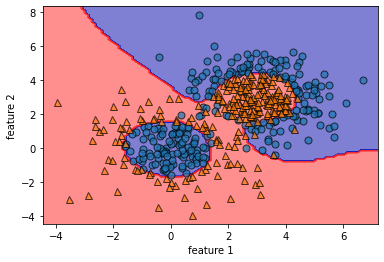

In [251]:
plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(grid_search.best_estimator_, X, y)


### SVM did a good job as we expected. What about DT?

### TODO: Find the best (single) DT model using hyperparameter optimization.

In [167]:
param_grid = {'max_depth': np.arange(20)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, 
                           return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 12}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)
Test score: 0.91


### TODO: Plot the decision boundary.

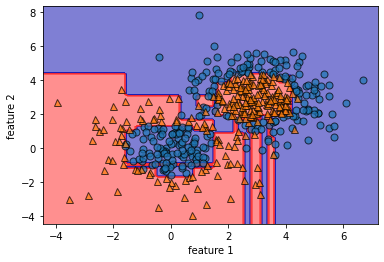

In [168]:
plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(grid_search.best_estimator_, X, y)


### Single DT did okay. Now, let's check out DT with AdaBoost.

In [169]:
# We want a poor base estimator, so we will use max_depth = 1
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", 
                           n_estimators=200, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.872

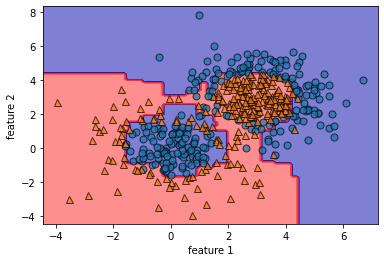

In [170]:
plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(model, X, y)


### Hyperparameter Optimization for AdaBoost

In [252]:
#param_grid = {'n_estimators': [10, 50, 100, 500, 1000],
#              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}


param_grid = {'base_estimator__max_depth': [3, 5, 10],
              'n_estimators': [10, 50, 100, 200],
              'learning_rate': [0.001, 0.01, 0.1, 1.0]}

grid_search = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(), 
                                              algorithm="SAMME", random_state=0), 
                           param_grid, cv=5, return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'base_estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 50}
Best model: AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, random_state=0)
Test score: 0.96


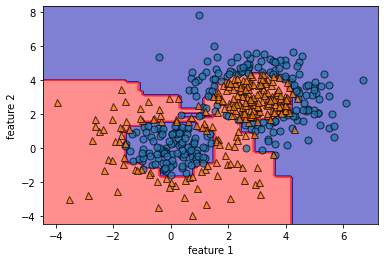

In [253]:
plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(grid_search.best_estimator_, X, y)


### The problem with outliers: we will use exactly the same two Gaussian dataset, but with an outlier.

Text(0, 0.5, 'Feature 2')

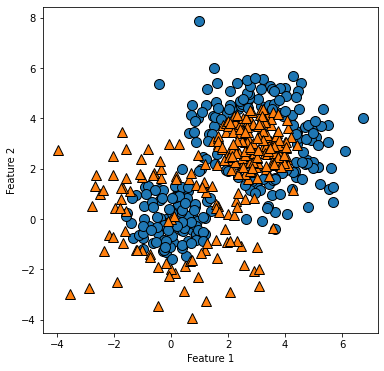

In [254]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, 
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, 
                                 n_classes=2, random_state=1)

# Merge the two Gaussian
X = np.concatenate((X1, X2))
# We reverse the class of y2
y = np.concatenate((y1, - y2 + 1))

# These are the outliers.
X_out = np.array([[0, 0], [0.1, 0.1], [-0.1, -0.1]])
y_out = np.array([1, 1, 1])

X = np.concatenate((X, X_out))
y = np.concatenate((y, y_out))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, ax = plt.subplots(figsize=(6, 6))

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

0.8253968253968254


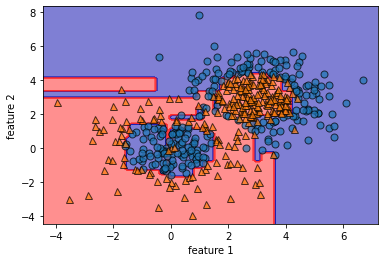

In [259]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), algorithm="SAMME", 
                           n_estimators=200, random_state=0)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(model, X, y)


### What about Random Forests? Does RF have the same problem?

### TODO: Build a RF model and make a plot showing the decision boundary.

0.9047619047619048


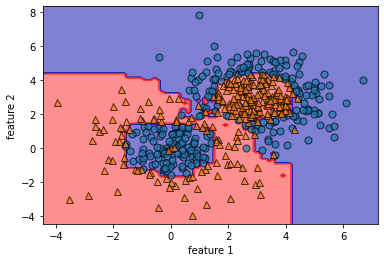

In [261]:
model = RandomForestClassifier(n_estimators=100, oob_score=True)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(model, X, y)


### Q: What did you find?

### Gradient Boosting Regressor

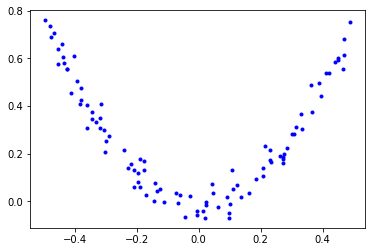

In [262]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

plt.plot(X, y, 'b.')

### Building a GBR model.

In [263]:
model = GradientBoostingRegressor(max_depth=2, n_estimators=20, learning_rate=1.0, random_state=42)
model.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=20,
                          random_state=42)

Text(0, 0.5, '$y$')

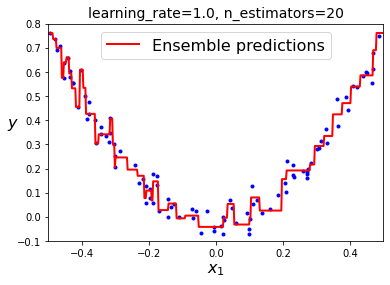

In [264]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    
fix, ax = plt.subplots(figsize=(6,4))

plot_predictions([model], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(model.learning_rate, model.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

Text(0.5, 0, '$x_1$')

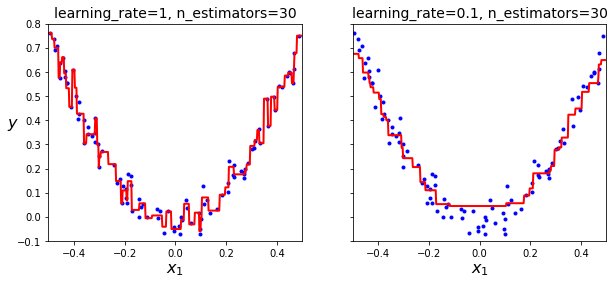

In [220]:
max_depth = 2
n_estimators = 30

model = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, 
                                  learning_rate=1, random_state=42)
model.fit(X, y)

model_slow = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, 
                                       learning_rate=0.1, random_state=42)
model_slow.fit(X, y)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([model], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(model.learning_rate, model.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([model_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(model_slow.learning_rate, model_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)


### Gradient Boosting with Early stopping

In [221]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

model = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
model.fit(X_train, y_train)

#Here, "staged_predict" gives the prediction at each stage.
errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]
best_n_estimators = np.argmin(errors) + 1

model_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, random_state=42)
model_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

Text(0.5, 0, '$x_1$')

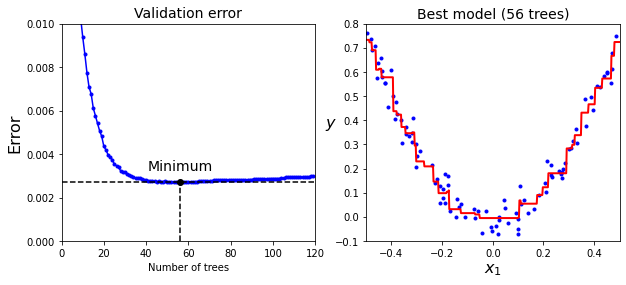

In [222]:
plt.figure(figsize=(10, 4))

min_error = np.min(errors)

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([model_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % best_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

### Should we run all the models to find the best model? We can stop early.

In [223]:
#When warm_start is set to True, reuse the solution of the previous call to fit 
#and add more estimators to the ensemble, otherwise, just erase the previous solution.

#See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#

model = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
error_tolerance = 5

for n_estimators in range(1, 120):
    model.n_estimators = n_estimators
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == error_tolerance:
            model.n_estimators = n_estimators - error_tolerance
            break  # early stopping

In [224]:
print(model.n_estimators)
print("Minimum validation MSE:", min_val_error)

56
Minimum validation MSE: 0.002712853325235463


Text(0.5, 0, '$x_1$')

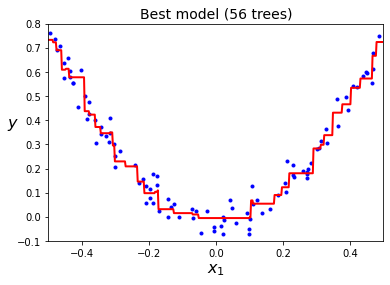

In [225]:
model_best = GradientBoostingRegressor(max_depth=2, n_estimators=model.n_estimators, random_state=42)
model_best.fit(X_train, y_train)

plot_predictions([model_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % model.n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

### Photometric redshift estimator using AdaBoost and Gradient Boosting

Our goal is to estimate photometric redshifts starting from observations of galaxy magnitudes in six different photometric bands (u, g, r, i, z, y).

Essentially, we try to reproduce/improve upon the results of [this paper](https://arxiv.org/abs/1903.08174), for which the data are public and available [here](http://d-scholarship.pitt.edu/36064/).

This example is from the ML book that is being written by Dr. Viviana Acquaviva.

In [269]:
import pandas as pd

features = pd.read_csv('/blue/ast4930/share/sel_features.csv', sep = '\t')
target = pd.read_csv('/blue/ast4930/share/sel_target.csv')

In [270]:
features

,u_apercor,g_apercor,r_apercor,i_apercor,z_apercor,y_apercor
0,24.2444,23.9796,23.5221,22.9110,22.5258,22.3291
1,24.4891,23.9162,22.9237,21.8738,21.3065,21.2514
2,24.8740,22.9739,21.4659,20.7884,20.4623,20.4137
3,24.5290,24.3386,23.8912,23.2061,22.9893,23.1124
4,23.6412,23.3874,22.9753,22.2352,21.8097,21.5595
...,...,...,...,...,...,...
6302,24.4551,24.2760,24.2338,24.1096,23.8095,23.3895
6303,23.4610,23.0077,22.3591,21.5531,20.9463,20.9721
6304,24.6150,22.9851,21.6015,21.0273,20.7327,20.5881
6305,22.6113,22.0808,21.4048,21.1883,20.9630,20.9989


In [271]:
target

,zhelio
0,1.0034
1,0.9023
2,0.4242
3,0.7690
4,0.9910
...,...
6302,1.4731
6303,0.9910
6304,0.3703
6305,0.3710


In [272]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target.values.ravel(), random_state=49)


### Let's use the "default" AdaBoostRegressor and see what happens.

In [230]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, GridSearchCV

model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

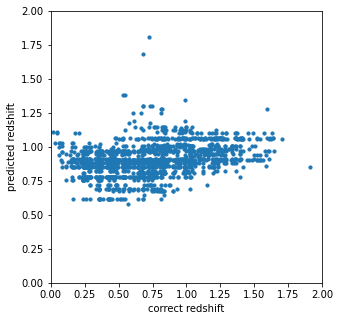

In [231]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(y_test, y_pred, s=10)

ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_xlabel('correct redshift')
ax.set_ylabel('predicted redshift')
ax.set_aspect('equal')

### Okay, not very impressive... What's our model again?

In [232]:
#base_estimator: If None, then the base estimator is DecisionTreeRegressor(max_depth=3).

model.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

### The default model might be too poor given the size of the data. Let's try to use somewhat better initial estimator to start with by varying "max_depth".

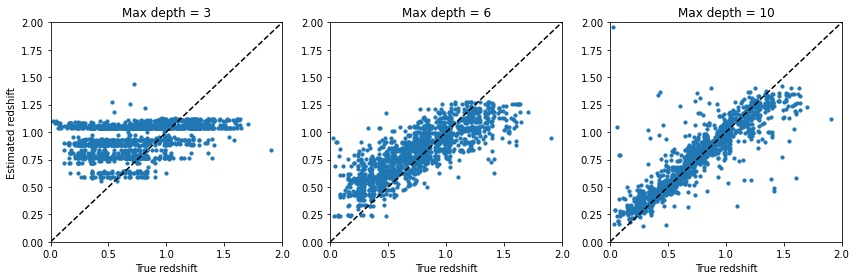

In [233]:
from sklearn.tree import DecisionTreeRegressor

plt.figure(figsize=(12,4))

for i, depth in enumerate([3,6,10]):
    plt.subplot(1,3,i+1)
    model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=depth))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, s=10)
    plt.title('Max depth = '+str(depth))
    plt.xlabel('True redshift')
    if i == 0:
        plt.ylabel('Estimated redshift')
    plt.ylim(0,2)
    plt.xlim(0,2)
    plt.plot([0.,2.],[0.,2.],'k--')
    
    plt.tight_layout()


### TODO: We can now try to optimize hyperparameters using GridSearchCV.

In [82]:
import time

tstart = time.time()

param_grid = {'base_estimator__max_depth': [6, 10],
              'n_estimators': [20, 50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0]}

# It took me about 1.5 minutes with 2 cores.

grid_search = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()), 
                           param_grid, cv=5, return_train_score=True, verbose=1, n_jobs=2)
                           
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'base_estimator__max_depth': 10, 'learning_rate': 1.0, 'n_estimators': 200}
Best model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  n_estimators=200)
Test score: 0.77
Elapsed time: 94.70 seconds


### TODO: Make a plot comparing correct redshift and predicted redshift.

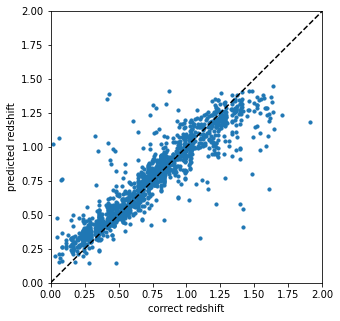

In [88]:
fig, ax = plt.subplots(figsize=(5, 5))

y_pred = grid_search.best_estimator_.predict(X_test)

ax.scatter(y_test, y_pred, s=10)
ax.plot([0.,2.],[0.,2.],'k--')

ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_xlabel('correct redshift')
ax.set_ylabel('predicted redshift')
ax.set_aspect('equal')

### Since AdaBoost is based on DT, it comes with feature importance.

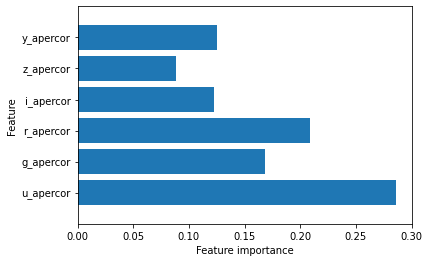

In [99]:
import numpy as np

model = grid_search.best_estimator_

def plot_feature_importances(model):
    n_features = X_test.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(model)

### Now, let's try GBR.

In [273]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

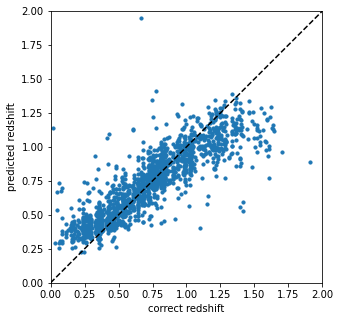

In [274]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(y_test, y_pred, s=10)
ax.plot([0.,2.],[0.,2.],'k--')

ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_xlabel('correct redshift')
ax.set_ylabel('predicted redshift')
ax.set_aspect('equal')

In [275]:
model.score(X_test, y_test)

0.6678161330910292

### TODO: Build a GBR model using hyperparameter optimization.

In [244]:
import time

tstart = time.time()

param_grid = {'max_depth': [3, 5, 10],
              'n_estimators': [20, 50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0]}

# It took me about 2 minutes with 2 cores.

grid_search = GridSearchCV(GradientBoostingRegressor(), 
                           param_grid, cv=5, return_train_score=True, verbose=1, n_jobs=2)
                           
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best model: GradientBoostingRegressor(max_depth=10, n_estimators=200)
Test score: 0.77
Elapsed time: 121.49 seconds


### TODO: Make a plot comparing correct redshift and predicted redshift.

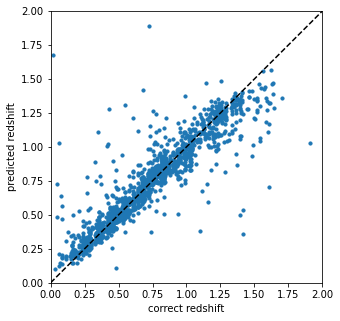

In [245]:
fig, ax = plt.subplots(figsize=(5, 5))

y_pred = grid_search.best_estimator_.predict(X_test)

ax.scatter(y_test, y_pred, s=10)
ax.plot([0.,2.],[0.,2.],'k--')

ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_xlabel('correct redshift')
ax.set_ylabel('predicted redshift')
ax.set_aspect('equal')

### TODO: It took a while. Can we stop early?

In [246]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor(max_depth=10, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
error_tolerance = 5

for n_estimators in range(1, 200):
    model.n_estimators = n_estimators
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == error_tolerance:
            model.n_estimators = n_estimators - error_tolerance
            break  # early stopping

In [247]:
print(model.n_estimators)
print("Minimum validation MSE:", min_val_error)
print("Test score:", model.score(X_test, y_test))

69
Minimum validation MSE: 0.029737562559272037
Test score: 0.7618427695310381


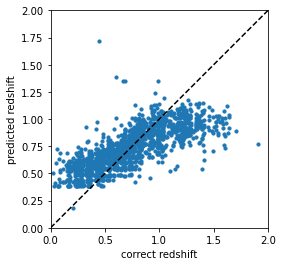

In [248]:
fig, ax = plt.subplots(figsize=(6,4))

model_best = GradientBoostingRegressor(max_depth=2, n_estimators=model.n_estimators, random_state=42)
model_best.fit(X_train, y_train)

y_pred = model_best.predict(X_test)

ax.scatter(y_test, y_pred, s=10)
ax.plot([0.,2.],[0.,2.],'k--')

ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_xlabel('correct redshift')
ax.set_ylabel('predicted redshift')
ax.set_aspect('equal')